***********************************************************************************
         Customer id  total_bill   tip     sex smoker   day    time  size  \
0    88F7B33d2bcf9f5       16.99  1.01  Female     No   Sun  Dinner     2   
1    f90cD3E76f1A9b9       10.34  1.66    Male     No   Sun  Dinner     3   
2    DbeAb8CcdfeFC2c       21.01  3.50    Male     No   Sun  Dinner     3   
3    A31Bee3c201ef58       23.68  3.31    Male     No   Sun  Dinner     2   
4    1bA7A3dc874da3c       24.59  3.61  Female     No   Sun  Dinner     4   
..               ...         ...   ...     ...    ...   ...     ...   ...   
194  eEb8321d0D36B9d       16.58  4.00    Male    Yes  Thur   Lunch     2   
195  F27ed8f681da5d9        7.56  1.44    Male     No  Thur   Lunch     2   
196  fF1E63fbf5e8fBF       10.34  2.00    Male    Yes  Thur   Lunch     2   
197  dC6B2D49f4e9a36       43.11  5.00  Female    Yes  Thur   Lunch     4   
198  0c70A677de78D7d       13.00  2.00  Female    Yes  Thur   Lunch  

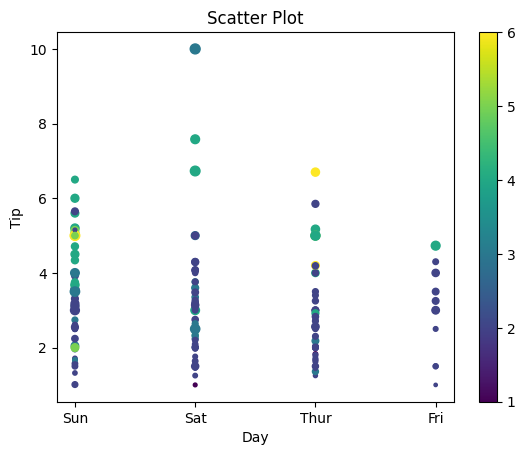

***********************************************************************************
		HISTOGRAM		


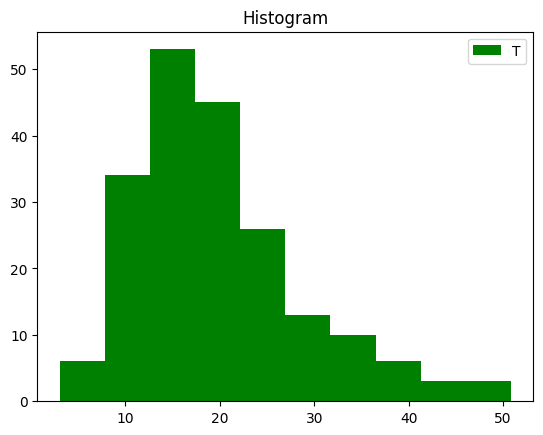

***********************************************************************************
		LINE CHART		


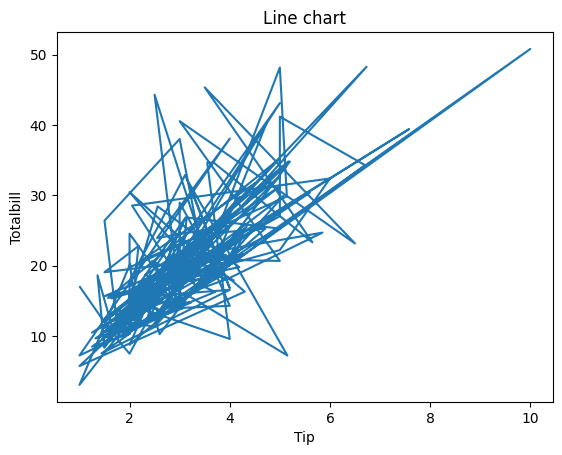

***********************************************************************************
		SCATTER 3D		


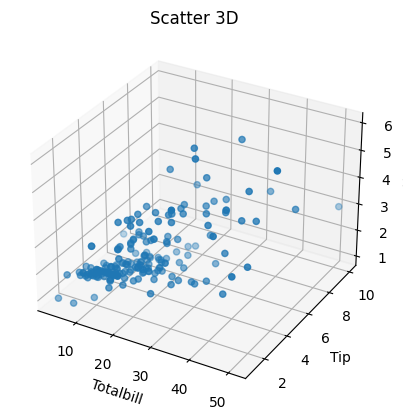

***********************************************************************************


***********************************************************************************
		LINEPLOT WITH SEABORN		


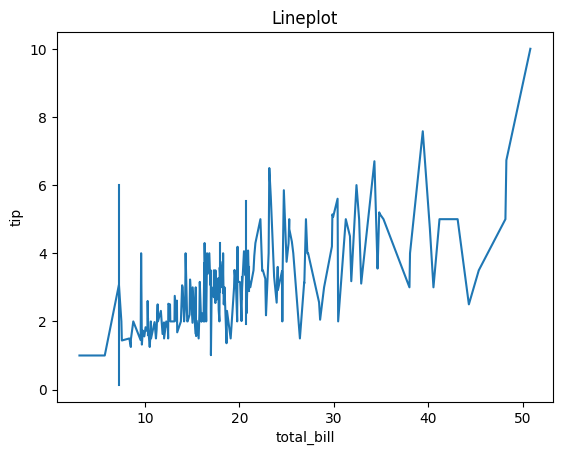

***********************************************************************************
		FILLED CONTOUR PLOT		


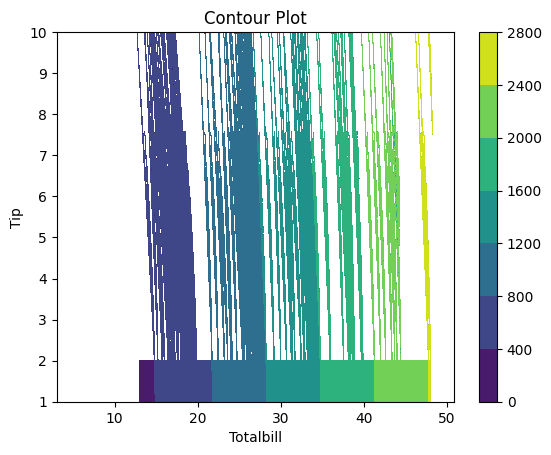

***********************************************************************************


In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
ds=pd.read_csv("Customers-200.csv")
print("***********************************************************************************")
print(ds)
print("***********************************************************************************")
print("\t\tLOGISTIC REGRESSION\t\t")
x = ds.iloc[:, [1,2]].values
y = ds.iloc[:, 4].values
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
print (xtrain[0:10, :])
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))
print("***********************************************************************************")
print("\t\tSCATTER PLOT\t\t")
plt.scatter(ds['day'], ds['tip'], c=ds['size'],s=ds['total_bill'])
plt.title("Scatter Plot")
plt.xlabel('Day')
plt.ylabel('Tip')
plt.colorbar()
plt.show()
print("***********************************************************************************")
print("\t\tHISTOGRAM\t\t")
plt.hist(ds['total_bill'],color='green')
plt.title("Histogram")
legend='Totalbill'
plt.legend(legend)
plt.show()
print("***********************************************************************************")
print("\t\tLINE CHART\t\t")
plt.title("Line chart")
plt.xlabel('Tip')
plt.ylabel('Totalbill')
plt.plot(ds['tip'],ds['total_bill'])
plt.show()
print("***********************************************************************************")
print("\t\tSCATTER 3D\t\t")
ax=plt.axes(projection='3d')
ax.scatter3D(ds['total_bill'],ds['tip'],ds['size'])
ax.set_xlabel('Totalbill')
ax.set_ylabel('Tip')
ax.set_zlabel('Size')
ax.set_title("Scatter 3D")
plt.show()
print("***********************************************************************************")
fig = px.pie(ds,values='tip', names='day')
fig.show()
print("***********************************************************************************")
print('\t\tLINEPLOT WITH SEABORN\t\t')
sns.lineplot(x = "total_bill", y = "tip", err_style='bars', errorbar='sd', data = ds)
plt.title('Lineplot')
plt.show()
print("***********************************************************************************")
print('\t\tFILLED CONTOUR PLOT\t\t')
xlist = ds['total_bill']
ylist = ds['tip']
X, Y = np.meshgrid(xlist, ylist)
Z = (X**2+Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.set_title('Contour Plot')
ax.set_xlabel('Totalbill')
ax.set_ylabel('Tip')
plt.show()
print("***********************************************************************************")